In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import matplotlib.patches as patches
from dataset_tio import SimImage, MRBrainS18Image, HCPImage, OASISImage, perc_norm
    # calculate_overlap, sim_data, MRBrainS18_data, HCP_data, OASIS_data, perc_norm
import torchio as tio
import nibabel as nib
print(os.getcwd())

/mnt/beta/djboonstoppel/Code


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
Sim = SimImage(number = 100206,
               middle_slices=None,
               data_resolution='1mm_07mm')
sim_LR = Sim.subject()['LR'][tio.DATA][0,20:300,10:290,100]
sim_HR = Sim.subject()['HR'][tio.DATA][0,20:300,10:290,100]
sim_diff = (Sim.subject()['LR'][tio.DATA] - Sim.subject()['HR'][tio.DATA])[0,20:300,10:290,100]
# plt.imshow(sim_LR)

In [4]:
HCP = HCPImage(number = 120010,
               middle_slices=None)
# plt.imshow(HCP.subject()['HR'][tio.DATA][0,30:290,25:285,100])
HCP_LR = HCP.subject()['LR'][tio.DATA][0,30:290,25:285,100]
HCP_HR = HCP.subject()['HR'][tio.DATA][0,30:290,25:285,100]
HCP_diff = (HCP.subject()['LR'][tio.DATA] - HCP.subject()['HR'][tio.DATA])[0,30:290,25:285,100]
# plt.imshow(HCP_LR)

In [5]:
def load_result(folder, source, no, exp_name):
    root = '/mnt/beta/djboonstoppel/Code'

    if source == 'sim':
        img_fname = "08-Apr-2022_Ernst_labels_{:06d}_3T_T1w_MPR1_img_act_1_contrast_1_SR_".format(no)+exp_name+'.nii.gz'
    elif source == 'hcp':
        img_fname = "{:06d}_3T_T1w_MPR1_img_SR_".format(no)+exp_name+'.nii.gz'
    elif source == 'oasis':
        img_fname = "OAS1_{:04d}_MR1_mpr_n4_anon_111_t88_masked_gfc_SR_".format(no)+exp_name+'.nii.gz'
    elif source == 'mrbrains':
        img_fname = "p{:01d}_reg_T1_SR_".format(no)+exp_name+'.nii.gz'
    else:
        raise ValueError("Dataset '{}' not implemented".format(source))

    path = os.path.join(root, 'output', folder, source, exp_name, 'test', img_fname)
    nifty = nib.load(path)
    array = nifty.get_fdata()
    array_norm, _ = perc_norm(array)
    return array_norm

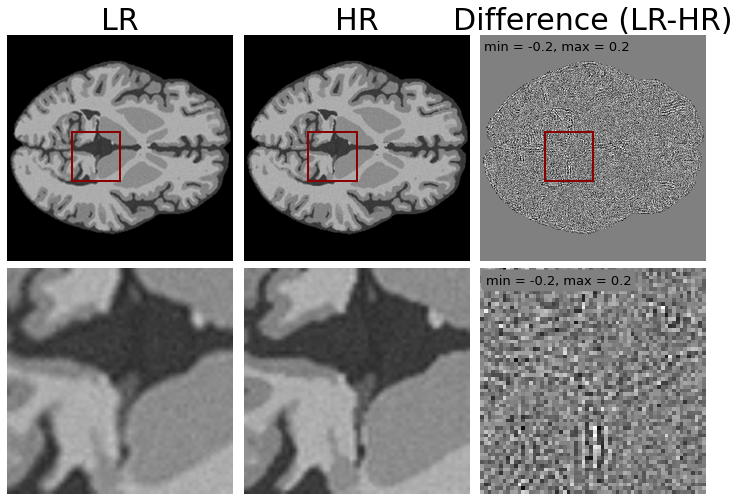

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7.1))
# fig.set_facecolor('white')
# fig.suptitle('Simulated data', fontsize=16)
for axis in axes:
    for xs in axis:
        xs.set_axis_off()
x1, x2, y1, y2 = 80, 140, 120, 180
rect0 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='darkred', facecolor='none')
rect1 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='darkred', facecolor='none')
rect2 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='darkred', facecolor='none')

axes[0,0].set_title('LR', fontsize=30)
axes[0,0].imshow(sim_LR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,0].imshow(sim_LR[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[0,0].add_patch(rect0)
axes[0,1].set_title('HR', fontsize=30)
axes[0,1].imshow(sim_HR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,1].imshow(sim_HR[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[0,1].add_patch(rect1)
axes[0,2].set_title('Difference (LR-HR)', fontsize=30)
axes[0,2].imshow(sim_diff, interpolation='nearest', cmap='gray', vmin=-0.2, vmax=0.2)
axes[1,2].imshow(sim_diff[y1:y2,x1:x2], interpolation='nearest', cmap='gray', vmin=-0.2, vmax=0.2)
axes[0,2].add_patch(rect2)
axes[0,2].text(5, 5, "min = -0.2, max = 0.2", size=13,
         ha="left", va="top",
         bbox=dict(boxstyle="round",
                   ec=(0.5, 0.5, 0.5),
                   fc=(0.5, 0.5, 0.5),
                   )
         )
axes[1,2].text(1, 1, "min = -0.2, max = 0.2", size=13,
         ha="left", va="top",
         bbox=dict(boxstyle="round",
                   ec=(0.5, 0.5, 0.5),
                   fc=(0.5, 0.5, 0.5),
                   )
         )

plt.tight_layout()
plt.show()
path = 'figs'
name = 'sim_methods'
# fig.savefig(os.path.join(path, 'png', name+'.png'), dpi=300, bbox_inches='tight')
# fig.savefig(os.path.join(path, 'eps', name+'.eps'), format='eps', bbox_inches='tight')

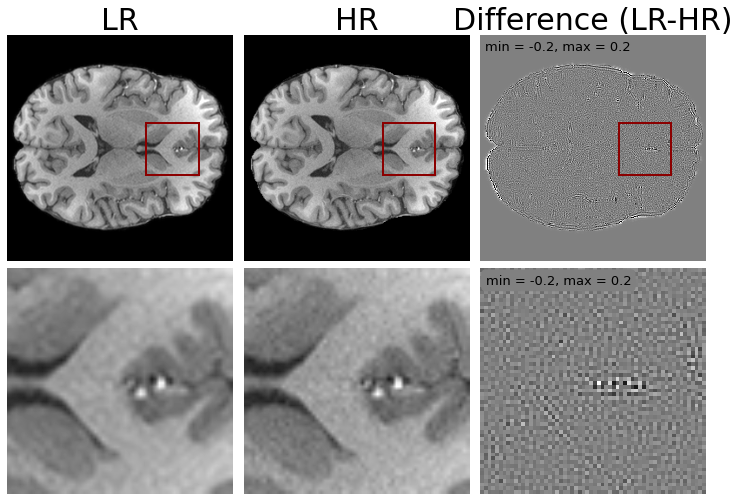

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7.1))
# fig.set_facecolor('white')
# fig.suptitle('HCP data', fontsize=16)
for axis in axes:
    for xs in axis:
        xs.set_axis_off()
x1, x2, y1, y2 = 160, 220, 100, 160
rect0 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='darkred', facecolor='none')
rect1 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='darkred', facecolor='none')
rect2 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='darkred', facecolor='none')
interpolation = 'bilinear'


axes[0,0].set_title('LR', fontsize=30)
axes[0,0].imshow(HCP_LR, interpolation=interpolation, cmap='gray', vmin=0, vmax=1.5)
axes[1,0].imshow(HCP_LR[y1:y2,x1:x2], interpolation=interpolation, cmap='gray', vmin=0, vmax=1.5)
axes[0,0].add_patch(rect0)
axes[0,1].set_title('HR', fontsize=30)
axes[0,1].imshow(HCP_HR, interpolation=interpolation, cmap='gray', vmin=0, vmax=1.5)
axes[1,1].imshow(HCP_HR[y1:y2,x1:x2], interpolation=interpolation, cmap='gray', vmin=0, vmax=1.5)
axes[0,1].add_patch(rect1)
axes[0,2].set_title('Difference (LR-HR)', fontsize=30)
# diff = HCP.subject()['LR'][tio.DATA] - HCP.subject()['HR'][tio.DATA]
axes[0,2].imshow(HCP_diff, interpolation='nearest', cmap='gray', vmin=-0.2, vmax=0.2)
axes[1,2].imshow(HCP_diff[y1:y2,x1:x2], interpolation='nearest', cmap='gray', vmin=-0.2, vmax=0.2)
axes[0,2].add_patch(rect2)
axes[0,2].text(5, 5, "min = -0.2, max = 0.2", size=13,
         ha="left", va="top",
         bbox=dict(boxstyle="round",
                   ec=(0.5, 0.5, 0.5),
                   fc=(0.5, 0.5, 0.5),
                   )
         )
axes[1,2].text(1, 1, "min = -0.2, max = 0.2", size=13,
         ha="left", va="top",
         bbox=dict(boxstyle="round",
                   ec=(0.5, 0.5, 0.5),
                   fc=(0.5, 0.5, 0.5),
                   )
         )


plt.tight_layout()
plt.show()
path = 'figs'
name = 'hcp_methods'

# fig.savefig(os.path.join(path, 'png', name+'.png'), dpi=300, bbox_inches='tight')
# fig.savefig(os.path.join(path, 'eps', name+'.eps'), format='eps', bbox_inches='tight')

In [36]:
Sim = SimImage(number = 101006,
               middle_slices=None,
               data_resolution='1mm_07mm')
sim_LR = Sim.subject()['LR'][tio.DATA][0,30:290,20:280,100]
sim_HR = Sim.subject()['HR'][tio.DATA][0,30:290,20:280,100]

folder = 'losses-final'
source = 'sim'
no = 100307


alpha_pixel = 0.7
alpha_edge = 0.3
alpha_perceptual = 0
alpha_adversarial = 0
exp_name = 'px{}_edge{}_vgg{}_gan{}'.format(alpha_pixel,
                                            alpha_edge,
                                            alpha_perceptual,
                                            alpha_adversarial).replace('.', '')
base = load_result(folder, source, no, exp_name)[30:290,20:280,100]

alpha_pixel = 0.7
alpha_edge = 0.3
alpha_perceptual = 1
alpha_adversarial = 0
exp_name = 'px{}_edge{}_vgg{}_gan{}'.format(alpha_pixel,
                                            alpha_edge,
                                            alpha_perceptual,
                                            alpha_adversarial).replace('.', '')
vgg = load_result(folder, source, no, exp_name)[30:290,20:280,100]

alpha_pixel = 0.7
alpha_edge = 0.3
alpha_perceptual = 0
alpha_adversarial = 0.1
exp_name = 'px{}_edge{}_vgg{}_gan{}'.format(alpha_pixel,
                                            alpha_edge,
                                            alpha_perceptual,
                                            alpha_adversarial).replace('.', '')
gan = load_result(folder, source, no, exp_name)[30:290,20:280,100]

alpha_pixel = 0.7
alpha_edge = 0.3
alpha_perceptual = 1
alpha_adversarial = 0.1
exp_name = 'px{}_edge{}_vgg{}_gan{}'.format(alpha_pixel,
                                            alpha_edge,
                                            alpha_perceptual,
                                            alpha_adversarial).replace('.', '')
total = load_result(folder, source, no, exp_name)[30:290,20:280,100]

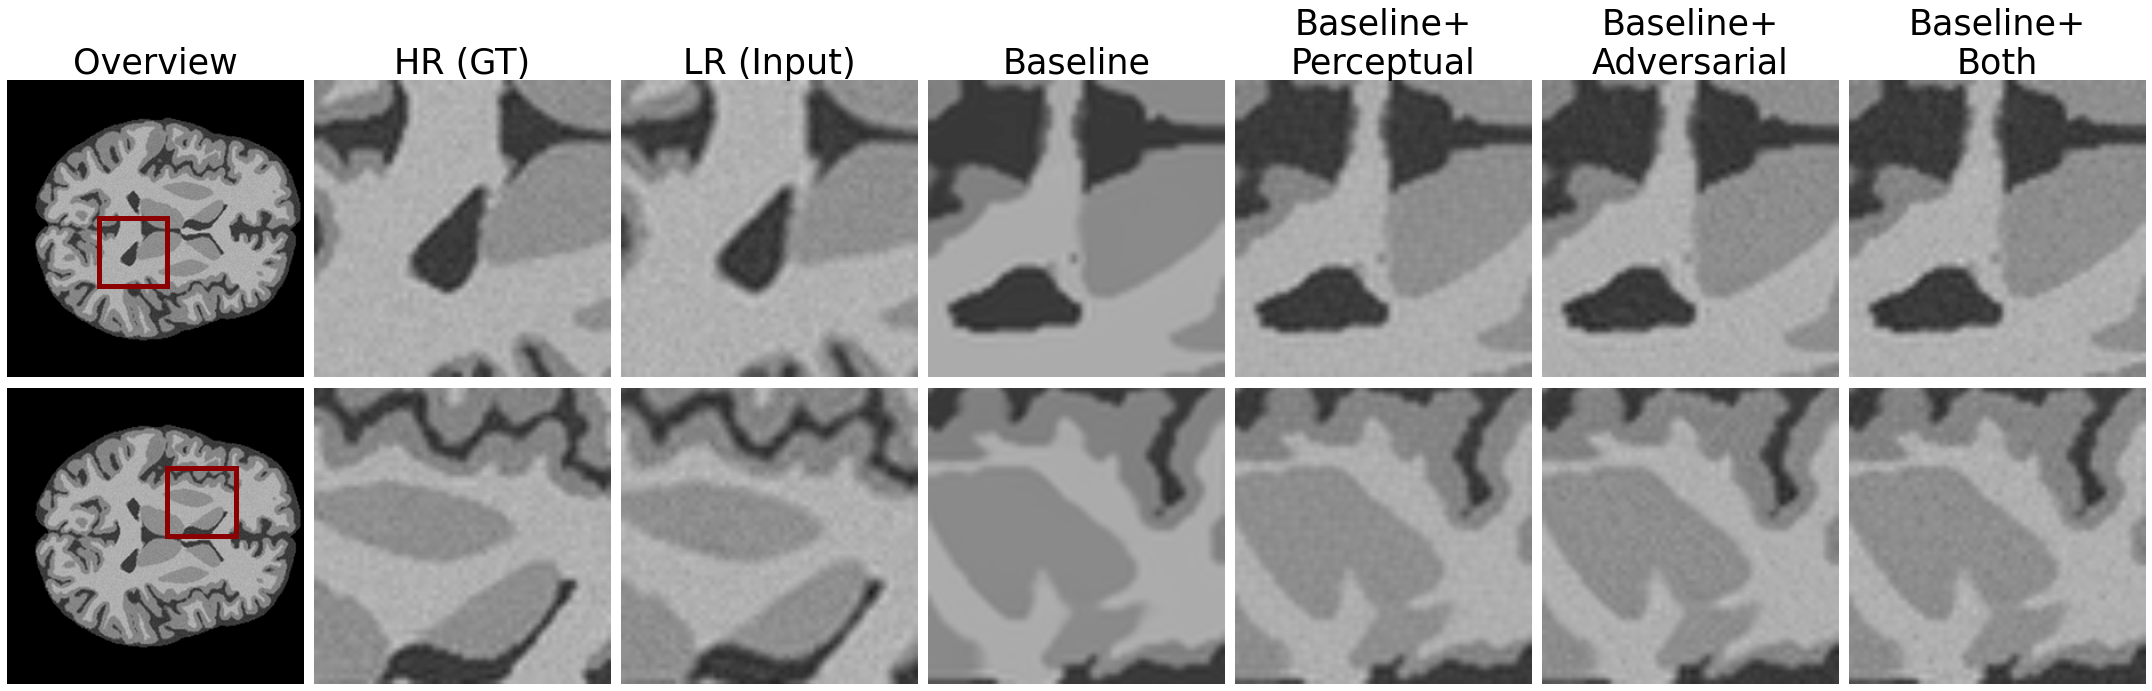

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(30, 10))
# fig.set_facecolor('white')
# fig.suptitle('Simulated data', fontsize=16)
for axis in axes:
    for xs in axis:
        xs.set_axis_off()
x1, x2, y1, y2 = 80, 140, 120, 180
x3, x4, y3, y4 = 140, 200, 70, 130
rect0 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=5, edgecolor='darkred', facecolor='none')
rect1 = patches.Rectangle((x3, y3), (x4-x3), (y4-y3), linewidth=5, edgecolor='darkred', facecolor='none')
# rect2 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='darkred', facecolor='none')

axes[0,0].set_title('Overview', fontsize=35)
axes[0,0].imshow(sim_HR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,0].imshow(sim_HR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[0,0].add_patch(rect0)
axes[1,0].add_patch(rect1)

axes[0,1].set_title('HR (GT)', fontsize=35)
axes[0,1].imshow(sim_HR[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,1].imshow(sim_HR[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,2].set_title('LR (Input)', fontsize=35)
axes[0,2].imshow(sim_LR[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,2].imshow(sim_LR[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,3].set_title('Baseline', fontsize=35)
axes[0,3].imshow(base[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,3].imshow(base[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,4].set_title('Baseline+\nPerceptual', fontsize=35)
axes[0,4].imshow(vgg[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,4].imshow(vgg[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,5].set_title('Baseline+\nAdversarial', fontsize=35)
axes[0,5].imshow(gan[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,5].imshow(gan[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,6].set_title('Baseline+\nBoth', fontsize=35)
axes[0,6].imshow(total[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,6].imshow(total[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

plt.tight_layout()
plt.show()
path = 'figs'
name = 'results_exp1'
fig.savefig(os.path.join(path, 'png', name+'.png'), dpi=300, bbox_inches='tight')
fig.savefig(os.path.join(path, 'eps', name+'.eps'), format='eps', bbox_inches='tight')

In [42]:
Sim = SimImage(number = 100307,
               middle_slices=None,
               data_resolution='1mm_07mm')
sim_LR = Sim.subject()['LR'][tio.DATA][0,30:290,20:280,110]
sim_HR = Sim.subject()['HR'][tio.DATA][0,30:290,20:280,110]

HCP = HCPImage(number = 121416,
               middle_slices=None)
hcp_LR = HCP.subject()['LR'][tio.DATA][0,30:290,25:285,110]
hcp_HR = HCP.subject()['HR'][tio.DATA][0,30:290,25:285,110]

mrbrains = MRBrainS18Image(number = 4,
                           middle_slices=None)
mrbrains_lr = mrbrains.subject()['LR'][tio.DATA][0,25:205,30:220,24]

oasis = OASISImage(number = 16,
                   middle_slices=None)
oasis_lr = oasis.subject()['LR'][tio.DATA][0,:,15:190,90]

In [43]:
folder = 'data-final'

source = 'sim'
no = 100307
nr_sim = 0
nr_hcp = 30
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
sim_hcp = load_result(folder, source, no, name)[30:290,20:280,110]
nr_sim = 30
nr_hcp = 0
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
sim_sim = load_result(folder, source, no, name)[30:290,20:280,110]
nr_sim = 30
nr_hcp = 30
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
sim_mix = load_result(folder, source, no, name)[30:290,20:280,110]

source = 'hcp'
no = 121416
nr_sim = 0
nr_hcp = 30
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
hcp_hcp = load_result(folder, source, no, name)[20:300,10:290,110]
nr_sim = 30
nr_hcp = 0
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
hcp_sim = load_result(folder, source, no, name)[20:300,10:290,110]
nr_sim = 30
nr_hcp = 30
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
hcp_mix = load_result(folder, source, no, name)[20:300,10:290,110]


source = 'mrbrains'
no = 4
nr_sim = 0
nr_hcp = 30
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
mrbrains_hcp = load_result(folder, source, no, name)[25:205,30:220,24]
nr_sim = 30
nr_hcp = 0
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
mrbrains_sim = load_result(folder, source, no, name)[25:205,30:220,24]
nr_sim = 30
nr_hcp = 30
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
mrbrains_mix = load_result(folder, source, no, name)[25:205,30:220,24]

source = 'oasis'
no = 16
nr_sim = 0
nr_hcp = 30
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
oasis_hcp = load_result(folder, source, no, name)[:,15:190,90]
nr_sim = 30
nr_hcp = 0
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
oasis_sim = load_result(folder, source, no, name)[:,15:190,90]
nr_sim = 30
nr_hcp = 30
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
oasis_mix = load_result(folder, source, no, name)[:,15:190,90]

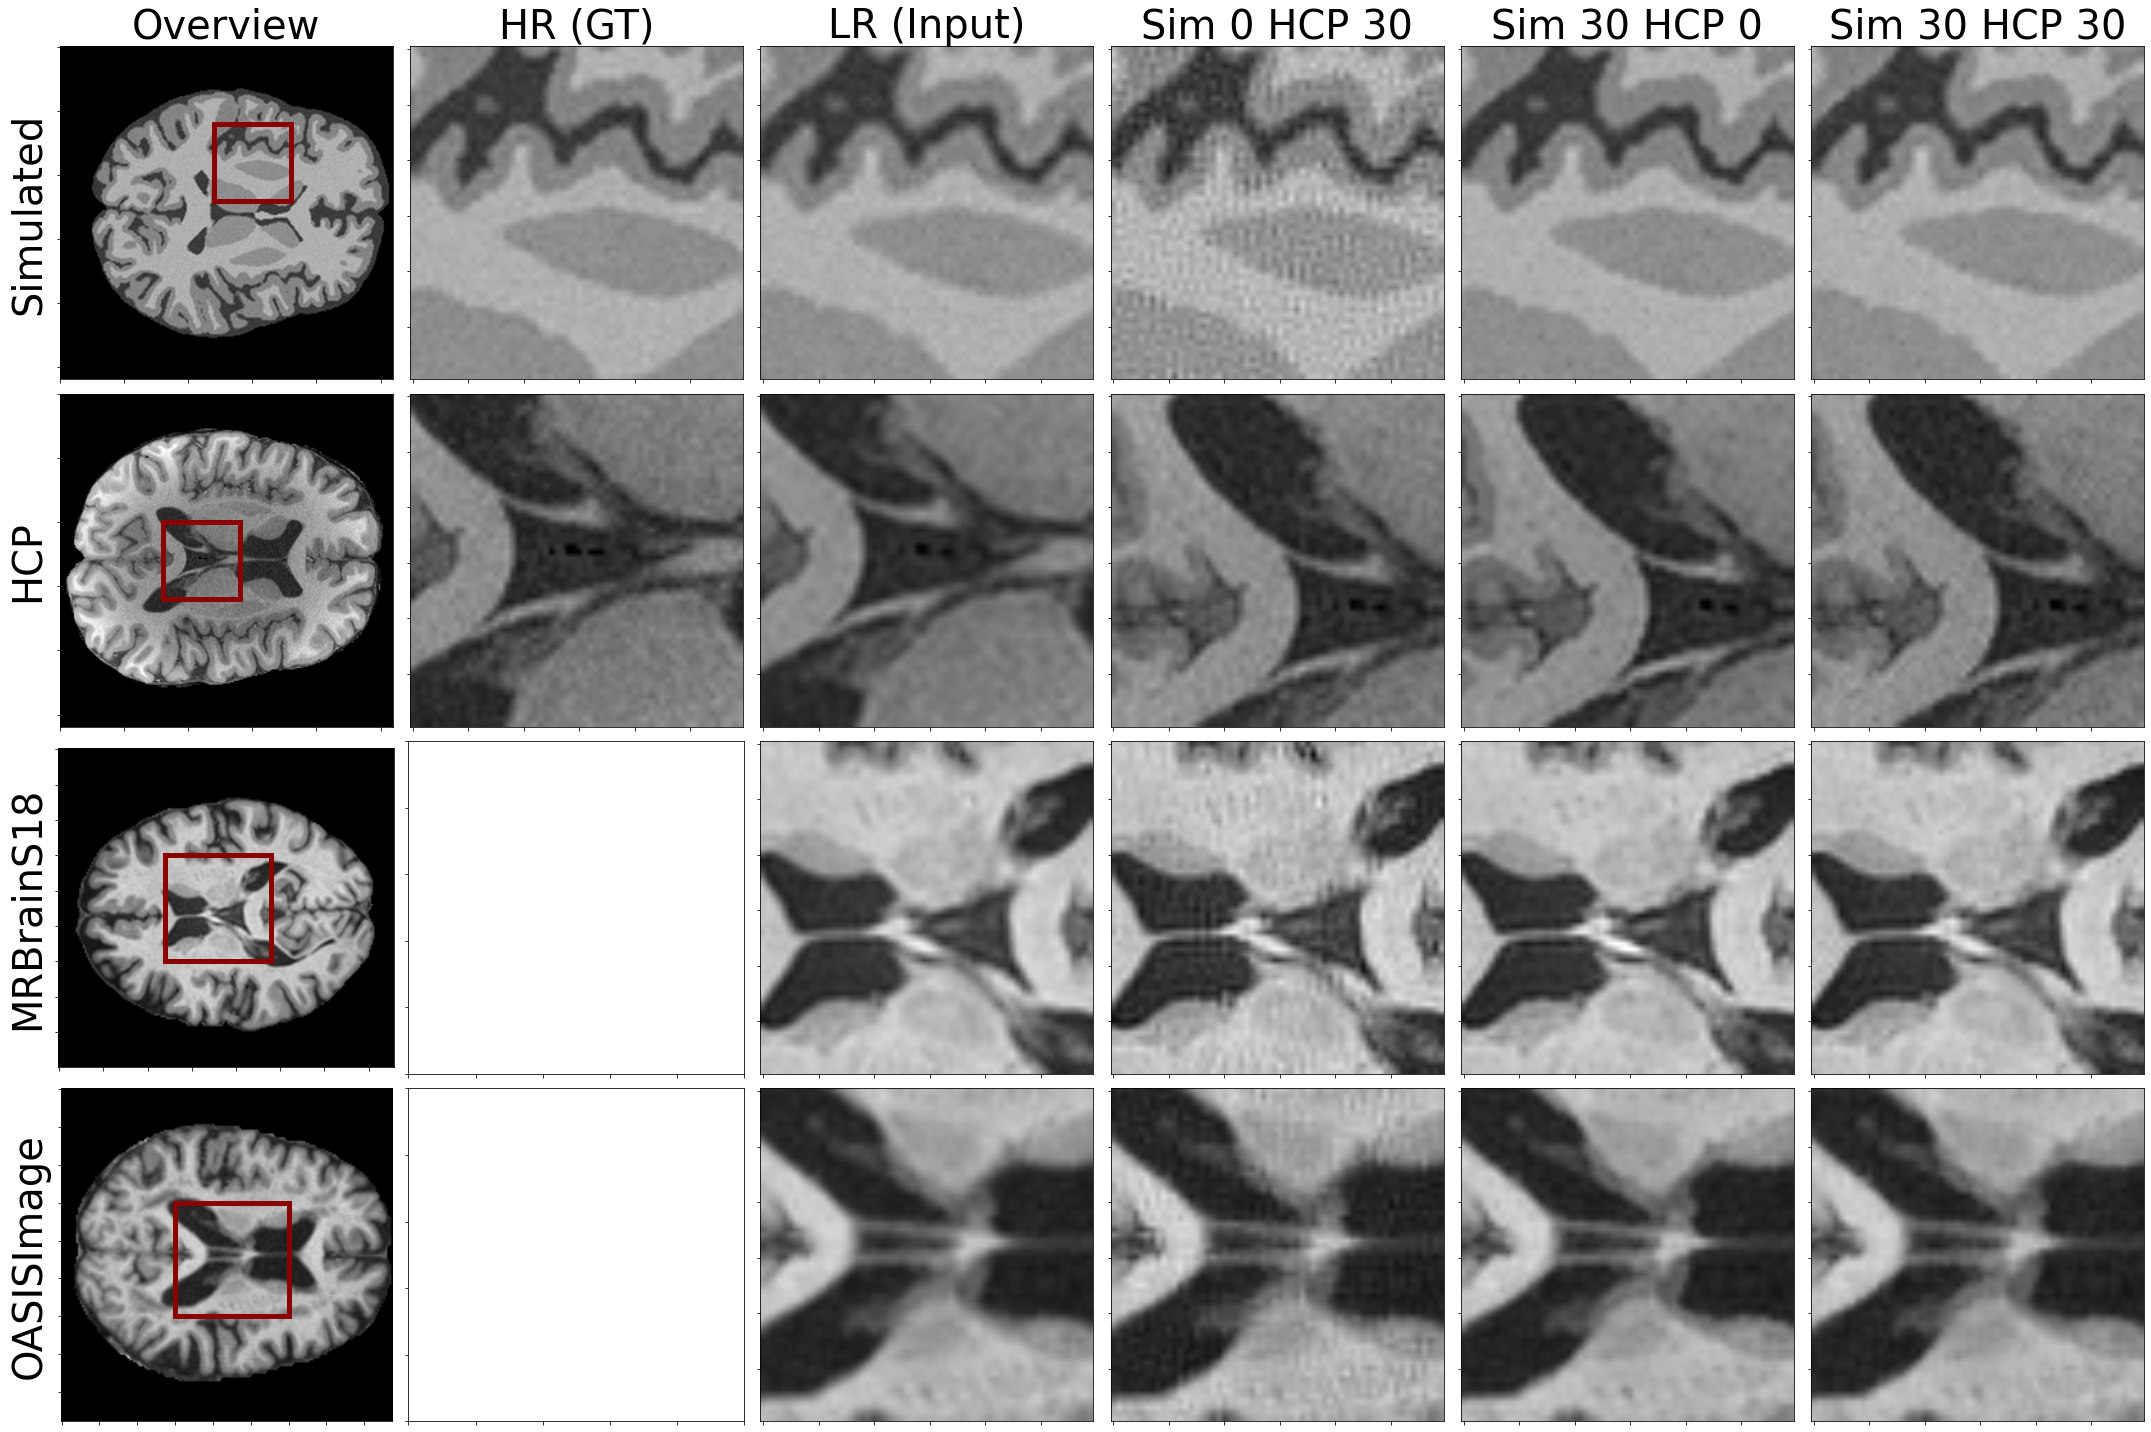

In [46]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(30, 20))#, gridspec_kw={'height_ratios': [1, 1, 0.9, 1]})
# fig.set_facecolor('white')
# fig.suptitle('Simulated data', fontsize=16)
for axis in axes:
    for xs in axis:
        # xs.set_axis_off()
        xs.set_yticklabels([])
        xs.set_xticklabels([])

x1_sim, x2_sim, y1_sim, y2_sim = 120, 180, 60, 120
x1_hcp, x2_hcp, y1_hcp, y2_hcp = 80, 140, 100, 160
x1_mrb, x2_mrb, y1_mrb, y2_mrb = 60, 120, 60, 120
x1_oas, x2_oas, y1_oas, y2_oas = 60, 120, 60, 120
# x3, x4, y3, y4 = 140, 200, 70, 130
rect0 = patches.Rectangle((x1_sim, y1_sim), (x2_sim-x1_sim), (y2_sim-y1_sim), linewidth=5, edgecolor='darkred', facecolor='none')
rect1 = patches.Rectangle((x1_hcp, y1_hcp), (x2_hcp-x1_hcp), (y2_hcp-y1_hcp), linewidth=5, edgecolor='darkred', facecolor='none')
rect2 = patches.Rectangle((x1_mrb, y1_mrb), (x2_mrb-x1_mrb), (y2_mrb-y1_mrb), linewidth=5, edgecolor='darkred', facecolor='none')
rect3 = patches.Rectangle((x1_oas, y1_oas), (x2_oas-x1_oas), (y2_oas-y1_oas), linewidth=5, edgecolor='darkred', facecolor='none')
# rect1 = patches.Rectangle((x3, y3), (x4-x3), (y4-y3), linewidth=2, edgecolor='darkred', facecolor='none')
# rect2 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='darkred', facecolor='none')
axes[0,0].set_title('Overview', fontsize=40)
axes[0,0].set_ylabel('Simulated', fontsize=40)
axes[0,0].imshow(sim_HR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,0].set_ylabel('HCP', fontsize=40)
axes[1,0].imshow(hcp_HR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[2,0].set_ylabel('MRBrainS18', fontsize=40)
axes[2,0].imshow(mrbrains_lr, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[3,0].set_ylabel('OASISImage', fontsize=40)
axes[3,0].imshow(oasis_lr, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[0,0].add_patch(rect0)
axes[1,0].add_patch(rect1)
axes[2,0].add_patch(rect2)
axes[3,0].add_patch(rect3)
# axes[1,0].add_patch(rect1)

axes[0,1].set_title('HR (GT)', fontsize=40)
axes[0,1].imshow(sim_HR[y1_sim:y2_sim,x1_sim:x2_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,1].imshow(hcp_HR[y1_hcp:y2_hcp,x1_hcp:x2_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,2].set_title('LR (Input)', fontsize=40)
axes[0,2].imshow(sim_LR[y1_sim:y2_sim,x1_sim:x2_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,2].imshow(hcp_LR[y1_hcp:y2_hcp,x1_hcp:x2_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[2,2].imshow(mrbrains_lr[y1_mrb:y2_mrb,x1_mrb:x2_mrb], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[3,2].imshow(oasis_lr[y1_oas:y2_oas,x1_oas:x2_oas], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,3].set_title('Sim 0 HCP 30', fontsize=40)
axes[0,3].imshow(sim_hcp[y1_sim:y2_sim,x1_sim:x2_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,3].imshow(hcp_hcp[y1_hcp:y2_hcp,x1_hcp:x2_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[2,3].imshow(mrbrains_hcp[y1_mrb:y2_mrb,x1_mrb:x2_mrb], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[3,3].imshow(oasis_hcp[y1_oas:y2_oas,x1_oas:x2_oas], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,4].set_title('Sim 30 HCP 0', fontsize=40)
axes[0,4].imshow(sim_sim[y1_sim:y2_sim,x1_sim:x2_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,4].imshow(hcp_sim[y1_hcp:y2_hcp,x1_hcp:x2_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[2,4].imshow(mrbrains_sim[y1_mrb:y2_mrb,x1_mrb:x2_mrb], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[3,4].imshow(oasis_sim[y1_oas:y2_oas,x1_oas:x2_oas], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,5].set_title('Sim 30 HCP 30', fontsize=40)
axes[0,5].imshow(sim_mix[y1_sim:y2_sim,x1_sim:x2_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,5].imshow(hcp_mix[y1_hcp:y2_hcp,x1_hcp:x2_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[2,5].imshow(mrbrains_mix[y1_mrb:y2_mrb,x1_mrb:x2_mrb], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[3,5].imshow(oasis_mix[y1_oas:y2_oas,x1_oas:x2_oas], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

plt.tight_layout()
plt.show()
path = 'figs'
name = 'results_exp2'
fig.savefig(os.path.join(path, 'png', name+'.png'), dpi=300, bbox_inches='tight')
fig.savefig(os.path.join(path, 'eps', name+'.eps'), format='eps', bbox_inches='tight')